In [1]:
import pandas as pd
 
df_orig = pd.read_csv("COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv")

In [2]:
df_orig

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,VT,2020/10/16,1,15,1,1,15,1,0.0,16,...,NaN,0,NaN,0,0.0,1,19.0,1,33.0,1
1,VI,2020/10/15,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,PR,2020/10/14,9,49,7,9,49,7,0.0,64,...,NaN,0,NaN,0,0.0,1,4.0,1,15.0,1
3,VI,2020/10/13,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,AL,2020/10/10,33,79,2,35,77,2,13.0,112,...,NaN,0,NaN,0,0.0,8,0.0,8,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47580,AK,2022/02/01,1,19,2,6,14,2,10.0,22,...,0.0,16,0.0,21,1.0,17,5.0,17,5.0,17
47581,FL,2022/02/10,9,190,72,39,171,61,219.0,265,...,11.0,251,36.0,265,33.0,265,726.0,265,1032.0,265
47582,HI,2022/01/29,3,18,5,4,18,4,11.0,26,...,0.0,18,1.0,23,0.0,19,67.0,20,97.0,20
47583,PR,2022/02/13,0,13,54,2,11,54,4.0,66,...,0.0,66,0.0,66,0.0,66,35.0,66,94.0,54


In [3]:
df_orig['date'] = pd.to_datetime(df_orig['date'],format='%Y-%m-%d') 

In [4]:
for i in df_orig: print(i) #para ver las columnas

state
date
critical_staffing_shortage_today_yes
critical_staffing_shortage_today_no
critical_staffing_shortage_today_not_reported
critical_staffing_shortage_anticipated_within_week_yes
critical_staffing_shortage_anticipated_within_week_no
critical_staffing_shortage_anticipated_within_week_not_reported
hospital_onset_covid
hospital_onset_covid_coverage
inpatient_beds
inpatient_beds_coverage
inpatient_beds_used
inpatient_beds_used_coverage
inpatient_beds_used_covid
inpatient_beds_used_covid_coverage
previous_day_admission_adult_covid_confirmed
previous_day_admission_adult_covid_confirmed_coverage
previous_day_admission_adult_covid_suspected
previous_day_admission_adult_covid_suspected_coverage
previous_day_admission_pediatric_covid_confirmed
previous_day_admission_pediatric_covid_confirmed_coverage
previous_day_admission_pediatric_covid_suspected
previous_day_admission_pediatric_covid_suspected_coverage
staffed_adult_icu_bed_occupancy
staffed_adult_icu_bed_occupancy_coverage
staffed_icu_

1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

In [5]:
df_pto1 = df_orig[['state','date','inpatient_beds_used_covid']]
df_pto1['date'] = pd.to_datetime(df_pto1['date']) 

mask = (df_pto1['date'] >='2020-01-01') & (df_pto1['date'] <= '2020-07-01')
filtro_df_pto1 = df_pto1.loc[mask]

top5mayorocup = filtro_df_pto1.groupby(['state']).sum().sort_values(['inpatient_beds_used_covid'],ascending=False).reset_index().head(5)

top5mayorocup

C:\Users\Lucas\AppData\Local\Temp\ipykernel_5368\573792484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pto1['date'] = pd.to_datetime(df_pto1['date'])


,state,inpatient_beds_used_covid
0,NY,687963.0
1,CA,441543.0
2,FL,329651.0
3,TX,253496.0
4,IL,215590.0


2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:

-Intervalos de crecimiento y decrecimiento
-Puntos críticos (mínimos y máximos)


In [6]:
#Puntos (Dias), Criticos, max y min en NY

df_pto2 = df_orig[df_orig['state'] == 'NY']

var = df_pto2['inpatient_beds_used_covid'].max()
diamayor = df_pto2[df_pto2['inpatient_beds_used_covid'] == var]
diamayor = diamayor.date.values
diamayor=pd.to_datetime(diamayor[0])
diamayor = str(diamayor.date())

var1 = df_pto2['inpatient_beds_used_covid'].min()
diamenor = df_pto2[df_pto2['inpatient_beds_used_covid'] == var1].reset_index()
diamenor = diamenor.date.values
diamenor=pd.to_datetime(diamenor[0])
diamenor = str(diamenor.date())

print('Datos de NY:')
print(f'El dia donde mayor ingresos de pacientes (Cantidad: {int(var)}) en cama con COVID fue el dia:\n{diamayor}')
print(f'El dia donde menor ingresos de pacientes (Cantidad: {int(var1)}) en cama con COVID fue el dia:\n{diamenor}')

Datos de NY:
El dia donde mayor ingresos de pacientes (Cantidad: 14126) en cama con COVID fue el dia:
2020-04-14
El dia donde menor ingresos de pacientes (Cantidad: 6) en cama con COVID fue el dia:
2020-03-14


c:\Users\Lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


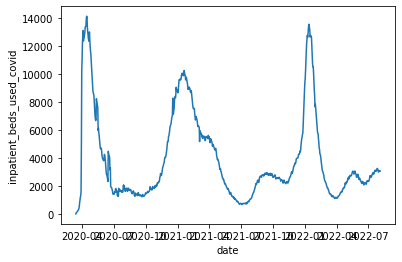

In [7]:
#Intervalos crecimiento, decrecimiento en NY
import seaborn as sns
import numpy as np
from matplotlib import rcParams

sns.lineplot(df_pto2['date'], df_pto2['inpatient_beds_used_covid'])
rcParams['figure.figsize'] = 15,10


3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

In [18]:
mask = (df_orig['date'] >='2021-01-01') & (df_orig['date'] <= '2021-12-31')
filtro_df_pto3 = df_orig.loc[mask]
filtro_df_pto3 = filtro_df_pto3[['state','date','deaths_covid']]
top5camasocupada = filtro_df_pto3.groupby(['state']).sum()
top5camasocupada = top5camasocupada.sort_values('deaths_covid',ascending=False)

top5camasocupada.head(5) #PARA RESPONDER EL DOC.

,deaths_covid
state,
CA,35108.0
TX,32889.0
FL,26004.0
NY,17620.0
AZ,16250.0


In [20]:
mask = (df_orig['date'] >='2021-01-01') & (df_orig['date'] <= '2021-12-31')
filtro_df_pto3 = df_orig.loc[mask]
filtro_df_pto3 = filtro_df_pto3[['state','date','staffed_adult_icu_bed_occupancy']]
top5camasocupada = filtro_df_pto3.groupby(['state']).sum()
top5camasocupada = top5camasocupada.sort_values('staffed_adult_icu_bed_occupancy',ascending=False)

top5camasocupada.head(5) #PARA RESPONDER EL DOC

,staffed_adult_icu_bed_occupancy
state,
TX,2231135.0
CA,2015269.0
FL,1890045.0
NY,1298758.0
PA,1056345.0


In [9]:
mask = (df_orig['date'] >='2020-01-01') & (df_orig['date'] <= '2020-12-31')
filtro_df_pto3 = df_orig.loc[mask]
filtro_df_pto3 = filtro_df_pto3[['state','date','staffed_adult_icu_bed_occupancy']]
top5camasocupada = filtro_df_pto3.groupby(['state']).sum()
top5camasocupada = top5camasocupada.sort_values('staffed_adult_icu_bed_occupancy',ascending=False)

top5camasocupada.head(5)

,staffed_adult_icu_bed_occupancy
state,
TX,991193.0
CA,901654.0
FL,799385.0
NY,495350.0
PA,465537.0


4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

In [10]:
mask = (df_orig['date'] >='2020-01-01') & (df_orig['date'] <= '2020-12-31')
filtro_df_pto4 = df_orig.loc[mask]
filtro_df_pto4 = filtro_df_pto4[['state','date','all_pediatric_inpatient_bed_occupied']]
var = filtro_df_pto4.groupby(['state']).sum()
var = var.sort_values('all_pediatric_inpatient_bed_occupied',ascending=False)

 

var.head(5)

,all_pediatric_inpatient_bed_occupied
state,
CA,483142.0
NY,440362.0
PA,280480.0
IL,274279.0
MI,233298.0


5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

In [11]:
filtro_df_pto5 = df_orig[['state','date','staffed_adult_icu_bed_occupancy','staffed_icu_adult_patients_confirmed_covid']]
filtro_df_pto5['porcentaje'] = filtro_df_pto5['staffed_icu_adult_patients_confirmed_covid']/filtro_df_pto5['staffed_adult_icu_bed_occupancy'] * 100
filtro_df_pto5 = filtro_df_pto5.groupby(['state']).mean()
filtro_df_pto5 = filtro_df_pto5.sort_values(['porcentaje'],ascending=False)
filtro_df_pto5.dropna()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_5368\1382049557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_df_pto5['porcentaje'] = filtro_df_pto5['staffed_icu_adult_patients_confirmed_covid']/filtro_df_pto5['staffed_adult_icu_bed_occupancy'] * 100


,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_covid,porcentaje
state,,,
NJ,1285.601864,226.972037,30.612542
ID,210.744341,63.388815,27.765475
UT,391.185087,104.588549,25.218124
TX,5854.940080,1521.463382,24.705511
AR,718.089947,185.641534,24.680913
OK,804.796272,203.782956,24.673849
AZ,1214.728362,316.245007,24.067199
MS,602.549677,146.672258,23.810943
MT,138.118509,36.338216,23.805185


6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [12]:
mask = (df_orig['date'] >='2021-01-01') & (df_orig['date'] <= '2021-12-31')
filtro_df_pto6 = df_orig.loc[mask]
filtro_df_pto6 = filtro_df_pto6[['state','date','deaths_covid']]

muertes_covid = filtro_df_pto6.groupby(['state']).sum()
muertes_covid = muertes_covid.sort_values(['deaths_covid'],ascending=False)

muertes_covid

,deaths_covid
state,
CA,35108.0
TX,32889.0
FL,26004.0
NY,17620.0
AZ,16250.0
PA,13363.0
GA,12338.0
OH,12023.0
NC,10922.0


In [13]:
total_muertes = int(muertes_covid['deaths_covid'].sum())
print(f'El total de muertes por covid en todos los estados es: {total_muertes}')

El total de muertes por covid en todos los estados es: 317015


7 - ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021? (reformulada)

In [14]:
mask = (df_orig['date'] >='2021-01-01') & (df_orig['date'] <= '2021-12-31')
filtro_df_pto7 = df_orig.loc[mask]
filtro_df_pto7 = filtro_df_pto7[['state','date','critical_staffing_shortage_today_yes','deaths_covid']]
filtro_df_pto7['mes'] = filtro_df_pto7['date'].dt.month 

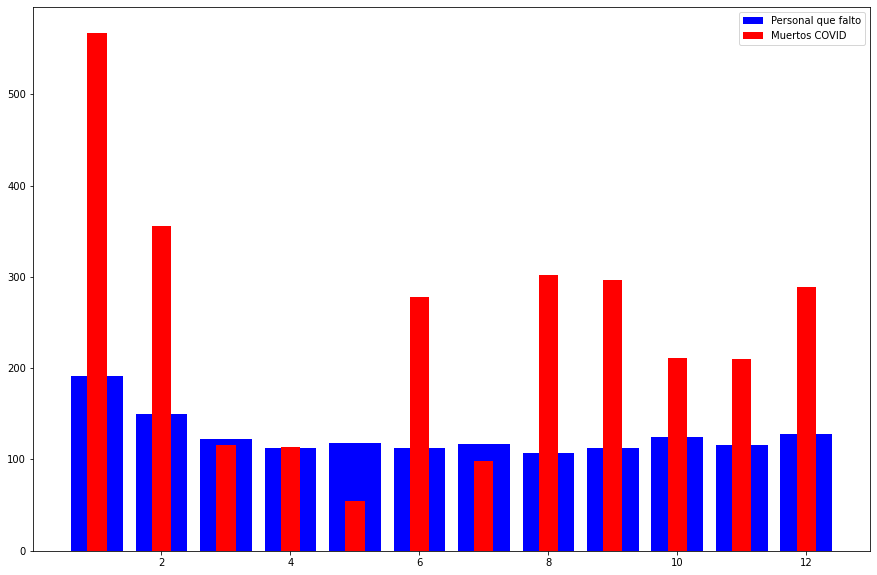

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = filtro_df_pto7['mes']
y = filtro_df_pto7['critical_staffing_shortage_today_yes']

y1 = filtro_df_pto7['deaths_covid']

plt.bar(x,y, color='blue')
plt.bar(x,y1,width=0.3,color='red')

plt.legend(labels=['Personal que falto', 'Muertos COVID'])

plt.show()

In [16]:
#Dia del mes donde mayor muertes hubo y la comparacion entre los fallecidos con  la falta de personal

8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

In [17]:
b = df_orig[['state','date','deaths_covid']]
b['mes'] = b['date'].dt.month
b = b.groupby(['mes']).sum().sort_values('deaths_covid',ascending=False)
b

C:\Users\Lucas\AppData\Local\Temp\ipykernel_5368\3718825443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['mes'] = b['date'].dt.month


,deaths_covid
mes,
1,108411.0
12,89215.0
5,69088.0
8,64159.0
9,60147.0
11,55131.0
2,52407.0
4,50677.0
10,47594.0


9 - ¿Qué recomendaciones haría, ex post, con respecto a los recursos hospitalarios y su uso?

Yo recomendaria lo siguiente:

sobre la infraestructura de los hospitales, evaluar bien el flujo de atencion que se les brinda a los pacientes sanos, adecuar las salas para evitar "amontonamiento" de personas que concurran al hospital.

Con respecto a las salas, verificar que se tenga una buena ventilacion (ej: puerta cerrada pero con ventana abierta hacia el exterior).
Tener en cuenta los espacios/salas que se van a utilizar para el aislamiento.

Capacitar al equipo de salud (ya sea con medidas de prevencion, brindarle informacion sobre el VIRUS, ayuda psicologica hacia los pacientes)

Brindar informacion publica, medidas de prevencion, horarios de los medicos, lugares de vacunacion hacia la comunidad.